**Importing Required Packages**

In [20]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

**Loading and Preprocessing the image data**

In [21]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [22]:
input_shape = (28,28,1)    # 1 is for channel

for preprocessing making sure to reshape our data.
values are floats so that we can get decimal points after division

In [23]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

normalizing the RGB codes by dividing it to the max RGB value

In [25]:
x_train = x_train / 255
x_test = x_test / 255
print("Shape of Training : ", x_train.shape)
print("Shape of Testing : ", x_test.shape)

Shape of Training :  (60000, 28, 28, 1)
Shape of Testing :  (10000, 28, 28, 1)


**Defining the models architecture**

In [26]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation = "softmax"))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 200)                 │         946,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

**Training the Model**

In [29]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 24ms/step - accuracy: 0.9416 - loss: 0.1994
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9750 - loss: 0.0806


**Estimates the models performance**

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9758 - loss: 0.0741
Loss = 0.062
Accuracy = 0.980


showing the image at position[] from dataset i.e first image

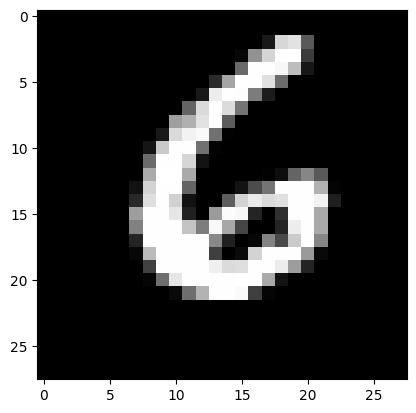

In [33]:
image = x_train[90]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

predicting the image class

In [34]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Predicted class: {}".format(np.argmax(predict_model)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted class: 6
